In [1]:
import os
import datetime

# 打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"==========" * 8 + "%s" % nowtime)

# mac系统上pytorch和matplotlib在jupyter中同时跑需要更改环境变量
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchkeras import Model, summary
%matplotlib inline

## 线性回归模型

### 准备数据

In [3]:
# 生成数据集
n = 400
X = 10 * torch.rand((n, 2)) - 5.0 # (n, 2)
w0 = torch.tensor([[2.0], [-3.0]]) # (2, 1)
b0 = torch.tensor([[10.0]]) # (1, 1)
Y = X @ w0 + b0 + torch.normal(0.0, 2.0, size=(n, 1))

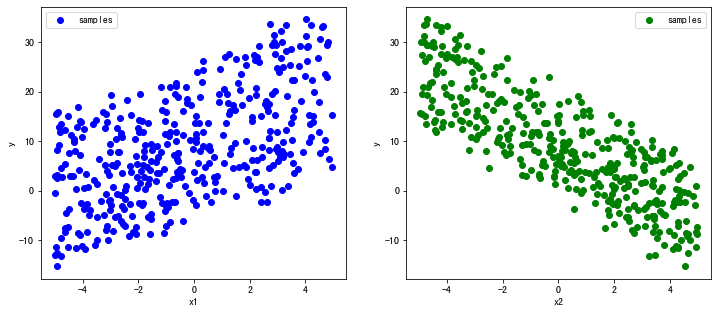

In [4]:
# 可视化
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c='b', label='samples')
ax1.legend()
plt.xlabel('x1')
plt.ylabel('y')

ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c='g', label='samples')
ax2.legend()
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

In [5]:
# 构建输入数据管道
ds = TensorDataset(X, Y)
ds_train,ds_valid = torch.utils.data.random_split(ds, [int(400 * 0.7), 400 - int(400 * 0.7)])
dl_train = DataLoader(ds_train, batch_size=10, shuffle=True, num_workers=2)
dl_valid = DataLoader(ds_valid, batch_size=10, num_workers=2)

### 定义模型

In [6]:
class LinearRegression(Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(2, 1)
        
    def forward(self, x):
        return self.fc(x)

In [7]:
model = LinearRegression()

In [8]:
model.summary(input_shape=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000008
Forward/backward pass size (MB): 0.000008
Params size (MB): 0.000011
Estimated Total Size (MB): 0.000027
----------------------------------------------------------------


### 训练模型

In [9]:
def mean_absolute_error(y_pred, y_true):
    return torch.mean(torch.abs(y_pred - y_true))

def mean_absolute_precent_error(y_pred, y_true):
    absolute_precent_error = (torch.abs(y_pred - y_true) + 1e-7) / (torch.abs(y_true) + 1e-7)
    return torch.mean(absolute_precent_error)

model.compile(
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(model.parameters(), lr=0.01),
    metrics_dict={'mae': mean_absolute_error, 'mape': mean_absolute_precent_error}
)

dfhistory = model.fit(
    epochs=200, # 从epochs=200来看, 52个epochs效果较好
    dl_train=dl_train,
    dl_val=dl_valid,
    log_step_freq=20
)

Start Training ...

================================================================================2021-06-22 09:15:35
{'step': 20, 'loss': 189.358, 'mae': 10.937, 'mape': 1.506}

 +-------+---------+--------+-------+----------+---------+----------+
| epoch |   loss  |  mae   |  mape | val_loss | val_mae | val_mape |
+-------+---------+--------+-------+----------+---------+----------+
|   1   | 192.112 | 10.964 | 1.389 | 210.695  |  11.793 |   1.13   |
+-------+---------+--------+-------+----------+---------+----------+

================================================================================2021-06-22 09:15:37
{'step': 20, 'loss': 174.404, 'mae': 10.631, 'mape': 1.528}

 +-------+---------+--------+------+----------+---------+----------+
| epoch |   loss  |  mae   | mape | val_loss | val_mae | val_mape |
+-------+---------+--------+------+----------+---------+----------+
|   2   | 171.074 | 10.404 | 1.39 | 186.492  |  11.105 |  1.044   |
+-------+---------+--------+------+---

{'step': 20, 'loss': 39.556, 'mae': 5.737, 'mape': 2.013}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   18  | 38.114 | 5.614 | 1.869 |  38.584  |  5.649  |  1.054   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:16:00
{'step': 20, 'loss': 35.998, 'mae': 5.476, 'mape': 2.164}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   19  | 35.339 | 5.411 | 1.809 |  35.97   |  5.453  |  1.024   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:16:02
{'step':

{'step': 20, 'loss': 11.863, 'mae': 2.93, 'mape': 1.069}

 +-------+--------+-------+------+----------+---------+----------+
| epoch |  loss  |  mae  | mape | val_loss | val_mae | val_mape |
+-------+--------+-------+------+----------+---------+----------+
|   35  | 11.543 | 2.884 | 0.89 |  11.789  |   2.86  |  0.573   |
+-------+--------+-------+------+----------+---------+----------+

================================================================================2021-06-22 09:16:23
{'step': 20, 'loss': 10.702, 'mae': 2.81, 'mape': 0.793}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   36  | 10.809 | 2.769 | 0.886 |  11.052  |  2.763  |   0.56   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:16:24
{'step': 20, 'l

{'step': 20, 'loss': 5.267, 'mae': 1.845, 'mape': 1.127}

 +-------+------+-------+-------+----------+---------+----------+
| epoch | loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+------+-------+-------+----------+---------+----------+
|   52  | 4.98 | 1.794 | 0.904 |  5.089   |   1.8   |  0.407   |
+-------+------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:16:45
{'step': 20, 'loss': 4.621, 'mae': 1.721, 'mape': 1.151}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   53  | 4.833 | 1.767 | 0.926 |  4.942   |   1.78  |   0.41   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:16:47
{'step': 20, 'loss': 4.43

{'step': 20, 'loss': 4.138, 'mae': 1.582, 'mape': 1.418}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   69  | 3.976 | 1.578 | 1.126 |  3.989   |  1.616  |   0.38   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:17:08
{'step': 20, 'loss': 4.223, 'mae': 1.618, 'mape': 1.473}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   70  | 3.965 | 1.576 | 1.135 |  3.965   |  1.609  |  0.378   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:17:09
{'step': 20, 'loss':

{'step': 20, 'loss': 4.209, 'mae': 1.651, 'mape': 1.581}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   86  | 3.911 | 1.563 | 1.193 |  3.877   |  1.586  |  0.371   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:17:30
{'step': 20, 'loss': 3.886, 'mae': 1.57, 'mape': 0.597}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   87  | 3.906 | 1.561 | 1.204 |   3.87   |  1.586  |  0.374   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:17:31
{'step': 20, 'loss': 

{'step': 20, 'loss': 3.908, 'mae': 1.555, 'mape': 1.433}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  103  | 3.903 | 1.561 | 1.225 |  3.862   |  1.582  |   0.37   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:17:52
{'step': 20, 'loss': 4.184, 'mae': 1.645, 'mape': 1.619}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  104  | 3.906 | 1.563 | 1.223 |  3.856   |  1.581  |  0.371   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:17:54
{'step': 20, 'loss':

{'step': 20, 'loss': 3.86, 'mae': 1.581, 'mape': 1.518}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  120  | 3.903 | 1.564 | 1.217 |  3.867   |  1.587  |  0.372   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:18:15
{'step': 20, 'loss': 3.839, 'mae': 1.569, 'mape': 1.533}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  121  | 3.912 | 1.563 | 1.211 |  3.871   |  1.589  |  0.374   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:18:17
{'step': 20, 'loss': 

{'step': 20, 'loss': 3.627, 'mae': 1.523, 'mape': 1.616}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  137  | 3.907 | 1.562 | 1.234 |  3.847   |  1.577  |  0.371   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:18:40
{'step': 20, 'loss': 4.008, 'mae': 1.614, 'mape': 1.538}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  138  | 3.924 | 1.563 | 1.213 |  3.861   |  1.586  |  0.375   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:18:41
{'step': 20, 'loss':

{'step': 20, 'loss': 4.085, 'mae': 1.589, 'mape': 1.579}

 +-------+------+-------+-------+----------+---------+----------+
| epoch | loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+------+-------+-------+----------+---------+----------+
|  154  | 3.92 | 1.564 | 1.217 |  3.855   |  1.579  |  0.368   |
+-------+------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:19:02
{'step': 20, 'loss': 3.653, 'mae': 1.487, 'mape': 1.508}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  155  | 3.914 | 1.566 | 1.221 |  3.872   |  1.588  |   0.37   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:19:03
{'step': 20, 'loss': 3.82

{'step': 20, 'loss': 4.192, 'mae': 1.628, 'mape': 1.548}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  171  | 3.918 | 1.567 | 1.225 |  3.872   |  1.584  |  0.366   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:19:24
{'step': 20, 'loss': 3.734, 'mae': 1.526, 'mape': 0.591}

 +-------+------+-------+-------+----------+---------+----------+
| epoch | loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+------+-------+-------+----------+---------+----------+
|  172  | 3.91 | 1.563 | 1.235 |   3.85   |  1.581  |  0.374   |
+-------+------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:19:26
{'step': 20, 'loss': 3.32

{'step': 20, 'loss': 3.626, 'mae': 1.515, 'mape': 1.387}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  188  | 3.919 | 1.568 | 1.222 |  3.852   |  1.583  |  0.374   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:19:49
{'step': 20, 'loss': 3.661, 'mae': 1.537, 'mape': 0.387}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  189  | 3.914 | 1.558 | 1.219 |  3.858   |  1.584  |  0.374   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-06-22 09:19:50
{'step': 20, 'loss':

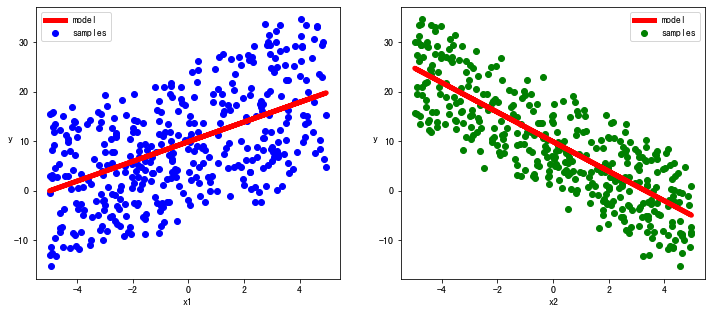

In [10]:
# 结果可视化
w, b = model.state_dict()["fc.weight"], model.state_dict()["fc.bias"]

plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c="b", label="samples")
ax1.plot(X[:, 0], w[0, 0] * X[:, 0] + b[0], "-r", linewidth=5.0, label="model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y", rotation=0)


ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c="g", label="samples")
ax2.plot(X[:, 1], w[0, 1] * X[:, 1] + b[0], "-r", linewidth=5.0, label="model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation=0)

plt.show()

### 评估模型

In [11]:
dfhistory.tail()

,loss,mae,mape,val_loss,val_mae,val_mape
195,3.913145,1.560516,1.223198,3.856701,1.582822,0.373609
196,3.904768,1.562196,1.219893,3.862322,1.582740,0.368537
197,3.922639,1.562097,1.224309,3.860151,1.582526,0.370896
198,3.905347,1.563139,1.223797,3.856468,1.577529,0.367133
199,3.909160,1.564915,1.225189,3.861832,1.581786,0.369007


In [12]:
def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()

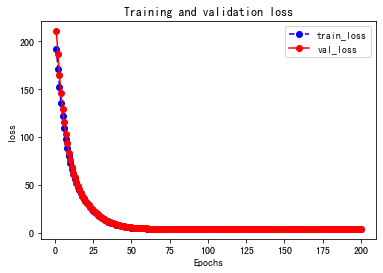

In [13]:
plot_metric(dfhistory, "loss")

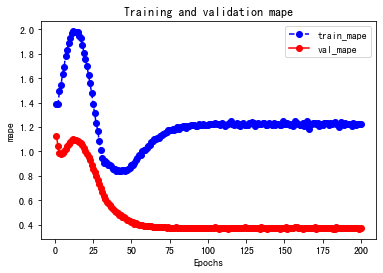

In [14]:
plot_metric(dfhistory,"mape")

In [15]:
# 评估
model.evaluate(dl_valid)

{'val_loss': 3.861832320690155,
 'val_mae': 1.5817859222491581,
 'val_mape': 0.36900749802589417}

In [16]:
dl = DataLoader(TensorDataset(X))
model.predict(dl)[0: 10]

tensor([[11.0632],
        [-2.9610],
        [ 2.0122],
        [ 2.1775],
        [ 4.3007],
        [21.5011],
        [-4.5194],
        [ 7.2206],
        [ 3.9792],
        [ 2.9521]])

In [17]:
model.predict(dl_valid)[0: 10]

tensor([[ 24.3693],
        [ -4.2540],
        [ 11.1653],
        [  5.0337],
        [  1.8395],
        [ 13.1693],
        [  3.2729],
        [-10.1614],
        [ 14.1898],
        [ -5.3891]])

## DNN二分类模型

### 准备数据

In [18]:
# 正负样本数
n_positive, n_negative = 2000, 2000

# 生成正样本, 小圆环分布
r_p = 5.0 + torch.normal(0.0, 1.0, size=(n_positive, 1))
theta_p = 2 * np.pi * torch.rand((n_positive, 1))
# torch.cat() axis=1 沿着列方向拼接
Xp = torch.cat([r_p * torch.cos(theta_p), r_p * torch.sin(theta_p)], axis=1)
Yp = torch.ones_like(r_p)

# 生成负样本, 大圆环分布
r_n = 8.0 + torch.normal(0.0, 1.0, size=(n_negative, 1))
theta_n = 2 * np.pi * torch.rand((n_negative, 1))
Xn = torch.cat([r_n * torch.cos(theta_n), r_n * torch.sin(theta_n)], axis=1)
Yn = torch.zeros_like(r_n)

# 汇总样本
X = torch.cat([Xp, Xn], axis=0) # 沿着行方向拼接
Y = torch.cat([Yp, Yn], axis=0)

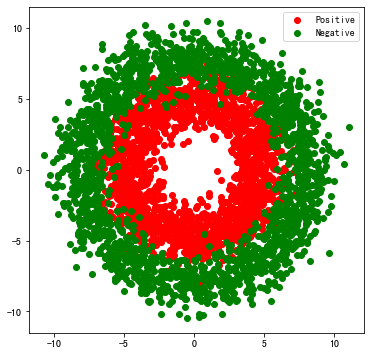

In [19]:
# 可视化
plt.figure(figsize=(6, 6))
plt.scatter(Xp[:, 0], Xp[:, 1], c='r')
plt.scatter(Xn[:, 0], Xn[:, 1], c='g')
plt.legend(['Positive', 'Negative'])
plt.show()

In [20]:
ds = TensorDataset(X, Y)

ds_train, ds_valid = torch.utils.data.random_split(ds, [int(len(ds) * 0.7), len(ds) - int(len(ds) * 0.7)])
dl_train = DataLoader(ds_train, batch_size=100, shuffle=True, num_workers=2)
dl_valid = DataLoader(ds_valid, batch_size=100, num_workers=2)

### 定义模型

In [21]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 8)
        self.fc3 = nn.Linear(8, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = nn.Sigmoid()(self.fc3(x))
        return y
    
model = Model(Net())
model.summary(input_shape=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              12
            Linear-2                    [-1, 8]              40
            Linear-3                    [-1, 1]               9
Total params: 61
Trainable params: 61
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000008
Forward/backward pass size (MB): 0.000099
Params size (MB): 0.000233
Estimated Total Size (MB): 0.000340
----------------------------------------------------------------


### 训练模型

In [22]:
def accuracy(y_pred, y_true):
    y_pred = torch.where(
        y_pred > 0.5,
        torch.ones_like(y_pred, dtype=torch.float32),
        torch.zeros_like(y_pred, dtype=torch.float32)
    )
    acc = torch.mean(1 - abs(y_true - y_pred))
    return acc

model.compile(
    loss_func=nn.BCELoss(),
    optimizer=torch.optim.Adam(model.parameters(), lr=0.01),
    metrics_dict={'accuracy': accuracy}
)

dfhistory = model.fit(
    epochs=100,
    dl_train=dl_train,
    dl_val=dl_valid,
    log_step_freq=10
)

Start Training ...

================================================================================2021-06-22 09:20:07
{'step': 10, 'loss': 0.683, 'accuracy': 0.548}
{'step': 20, 'loss': 0.67, 'accuracy': 0.541}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   1   | 0.664 |  0.549   |  0.645   |    0.599     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:20:08
{'step': 10, 'loss': 0.633, 'accuracy': 0.599}
{'step': 20, 'loss': 0.631, 'accuracy': 0.612}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   2   | 0.628 |  0.611   |  0.611   |    0.645     |
+-------+-------+----------+----------+--------------+

=====================================


 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   18  | 0.192 |  0.924   |  0.199   |    0.924     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:20:33
{'step': 10, 'loss': 0.2, 'accuracy': 0.924}
{'step': 20, 'loss': 0.199, 'accuracy': 0.925}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   19  | 0.196 |  0.925   |  0.193   |    0.919     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:20:34
{'step': 10, 'loss': 0.216, 'accuracy': 0.913}
{'step': 20, 'loss': 0.203, 'accuracy': 0.921}

 +-------+-------+----------+----------+--------------+
|

{'step': 10, 'loss': 0.172, 'accuracy': 0.933}
{'step': 20, 'loss': 0.179, 'accuracy': 0.931}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   36  | 0.184 |  0.929   |  0.179   |    0.931     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:20:58
{'step': 10, 'loss': 0.187, 'accuracy': 0.927}
{'step': 20, 'loss': 0.186, 'accuracy': 0.926}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   37  | 0.183 |  0.929   |  0.204   |    0.916     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:21:00
{'step': 10, 'loss': 0.193, 'accuracy': 0.929}
{'step': 

{'step': 10, 'loss': 0.168, 'accuracy': 0.939}
{'step': 20, 'loss': 0.178, 'accuracy': 0.929}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   54  | 0.182 |  0.928   |  0.183   |    0.925     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:21:24
{'step': 10, 'loss': 0.175, 'accuracy': 0.919}
{'step': 20, 'loss': 0.175, 'accuracy': 0.924}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   55  | 0.183 |  0.924   |  0.192   |     0.92     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:21:26
{'step': 10, 'loss': 0.185, 'accuracy': 0.932}
{'step': 

{'step': 10, 'loss': 0.163, 'accuracy': 0.94}
{'step': 20, 'loss': 0.173, 'accuracy': 0.935}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   72  | 0.176 |  0.931   |  0.177   |    0.924     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:21:50
{'step': 10, 'loss': 0.179, 'accuracy': 0.929}
{'step': 20, 'loss': 0.178, 'accuracy': 0.929}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   73  | 0.176 |  0.931   |  0.169   |    0.927     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:21:51
{'step': 10, 'loss': 0.159, 'accuracy': 0.944}
{'step': 2

{'step': 10, 'loss': 0.166, 'accuracy': 0.928}
{'step': 20, 'loss': 0.167, 'accuracy': 0.934}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   90  | 0.174 |  0.931   |  0.169   |    0.927     |
+-------+-------+----------+----------+--------------+

================================================================================2021-06-22 09:22:15
{'step': 10, 'loss': 0.185, 'accuracy': 0.926}
{'step': 20, 'loss': 0.195, 'accuracy': 0.922}

 +-------+------+----------+----------+--------------+
| epoch | loss | accuracy | val_loss | val_accuracy |
+-------+------+----------+----------+--------------+
|   91  | 0.18 |   0.93   |  0.186   |    0.928     |
+-------+------+----------+----------+--------------+

================================================================================2021-06-22 09:22:17
{'step': 10, 'loss': 0.186, 'accuracy': 0.926}
{'step': 20, '

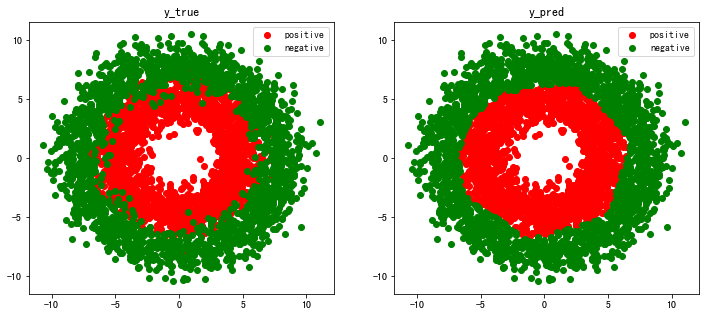

In [23]:
# 结果可视化
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax1.scatter(Xp[:, 0], Xp[:, 1], c="r")
ax1.scatter(Xn[:, 0], Xn[:, 1], c="g")
ax1.legend(["positive", "negative"])
ax1.set_title("y_true")

# torch.squeeze() 将张量维度中的1去除
Xp_pred = X[torch.squeeze(model.forward(X) >= 0.5)]
Xn_pred = X[torch.squeeze(model.forward(X) < 0.5)]

ax2.scatter(Xp_pred[:, 0], Xp_pred[:, 1], c="r")
ax2.scatter(Xn_pred[:, 0], Xn_pred[:, 1], c="g")
ax2.legend(["positive", "negative"])
ax2.set_title("y_pred")
plt.show()

### 评估模型

In [24]:
def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()

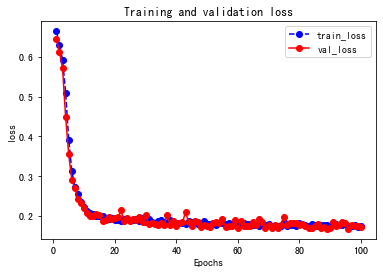

In [25]:
plot_metric(dfhistory, "loss")

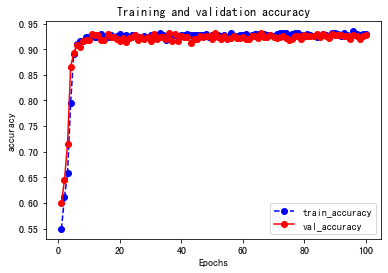

In [26]:
plot_metric(dfhistory, "accuracy")

In [27]:
model.evaluate(dl_valid)

{'val_loss': 0.17312628837923208, 'val_accuracy': 0.9283333321412405}

### 使用模型

In [28]:
model.predict(dl_valid)[0:10]

tensor([[4.7540e-01],
        [4.1913e-05],
        [9.9153e-01],
        [1.8628e-05],
        [1.9549e-05],
        [9.8742e-01],
        [9.9381e-01],
        [3.8066e-02],
        [1.5111e-01],
        [9.8955e-01]])